<a href="https://colab.research.google.com/github/chan-98/nlp-scripts/blob/main/sentiment_analysis_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MACHINE LEARNING MODEL TO PERFORM SENTIMENT ANALYSIS USING IMDB MOVIE REVIEWS DATA**

In [ ]:
!pip install transformers tensorflow datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.1/542.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 14.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.


In [ ]:
from datasets import load_dataset
import tensorflow as tf

In [ ]:
dataset = load_dataset("imdb")
dataset

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 25000
    })
    unsupervised: Dataset({
        features: ['text', 'label'],
        num_rows: 50000
    })
})

In [ ]:
train_dataset = dataset["train"]
test_dataset = dataset["test"]
train_dataset

Dataset({
    features: ['text', 'label'],
    num_rows: 25000
})

In [ ]:
print(train_dataset['text'][:2])
print(train_dataset['label'][:2])
print(train_dataset['text'][-2:])
print(train_dataset['label'][-2:])

['I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes are few and far between, e

In [ ]:
import pandas as pd

df_train = pd.DataFrame(train_dataset)
df_train

,text,label
0,I rented I AM CURIOUS-YELLOW from my video sto...,0
1,"""I Am Curious: Yellow"" is a risible and preten...",0
2,If only to avoid making this type of film in t...,0
3,This film was probably inspired by Godard's Ma...,0
4,"Oh, brother...after hearing about this ridicul...",0
...,...,...
24995,A hit at the time but now better categorised a...,1
24996,I love this movie like no other. Another time ...,1
24997,This film and it's sequel Barry Mckenzie holds...,1
24998,'The Adventures Of Barry McKenzie' started lif...,1


## **DATA PREPROCESSING**

Collect all the text and labels

In [ ]:
train_reviews = [review for review in train_dataset['text']]
train_labels = [label for label in test_dataset['label']]

len(train_reviews)

25000

### **CLEAN THE TEXT**

In [ ]:
import string

punc_list = list(string.punctuation) + ['@', '#', '$', '%', '^', '&', '*', '(', ')']
print(punc_list)

def remove_punctuations(text, punctuations):
  import string
  translator = str.maketrans('', '', ''.join(punctuations))
  return text.translate(translator)

print(train_reviews[0])
print(remove_punctuations(train_reviews[0], punc_list))

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', '@', '#', '$', '%', '^', '&', '*', '(', ')']
I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama 

In [ ]:
# clean all the reviews data

clean_reviews = []
for review in train_reviews:
  review = review.lower()
  clean_reviews.append(remove_punctuations(review, punc_list))

print(clean_reviews[0])

i rented i am curiousyellow from my video store because of all the controversy that surrounded it when it was first released in 1967 i also heard that at first it was seized by us customs if it ever tried to enter this country therefore being a fan of films considered controversial i really had to see this for myselfbr br the plot is centered around a young swedish drama student named lena who wants to learn everything she can about life in particular she wants to focus her attentions to making some sort of documentary on what the average swede thought about certain political issues such as the vietnam war and race issues in the united states in between asking politicians and ordinary denizens of stockholm about their opinions on politics she has sex with her drama teacher classmates and married menbr br what kills me about i am curiousyellow is that 40 years ago this was considered pornographic really the sex and nudity scenes are few and far between even then its not shot like some c

### **GET VOCAB_SIZE**

`vocab_size` is the number of unique words in the text corpus.

In [ ]:
vocab = []

for review in clean_reviews:
  words = review.split()
  for word in words:
    if word not in vocab:
      vocab.append(word)

print(len(vocab))

print(vocab[:5])

121364
['i', 'rented', 'am', 'curiousyellow', 'from']


### **TOKENIZE THE TEXT**

In tokenization, we break down all the words/sentences of a text into small parts called tokens.

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(
    num_words=None,                                         # num_words can be any number or None, if we dont know the vocab size.
    filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
    lower=True,
    split=' ',
    char_level=False,
    oov_token=None,
    analyzer=None
)

tokenizer.fit_on_texts(clean_reviews)

The `fit_on_texts()` method creates a dictionary with key-value pairs of the tokens (words) and numbers (indices). This association is stored in the form of a dictionary in the `tokenizer.word_index` attribute.

In [ ]:
print(tokenizer.word_index)

{'the': 1, 'and': 2, 'a': 3, 'of': 4, 'to': 5, 'is': 6, 'in': 7, 'it': 8, 'i': 9, 'this': 10, 'that': 11, 'br': 12, 'was': 13, 'as': 14, 'for': 15, 'with': 16, 'movie': 17, 'but': 18, 'film': 19, 'on': 20, 'not': 21, 'you': 22, 'are': 23, 'his': 24, 'have': 25, 'he': 26, 'be': 27, 'one': 28, 'its': 29, 'at': 30, 'all': 31, 'by': 32, 'an': 33, 'they': 34, 'from': 35, 'who': 36, 'so': 37, 'like': 38, 'her': 39, 'just': 40, 'or': 41, 'about': 42, 'has': 43, 'if': 44, 'out': 45, 'some': 46, 'there': 47, 'what': 48, 'good': 49, 'when': 50, 'more': 51, 'very': 52, 'even': 53, 'she': 54, 'my': 55, 'no': 56, 'up': 57, 'would': 58, 'which': 59, 'only': 60, 'time': 61, 'really': 62, 'story': 63, 'their': 64, 'were': 65, 'had': 66, 'see': 67, 'can': 68, 'me': 69, 'than': 70, 'we': 71, 'much': 72, 'well': 73, 'been': 74, 'get': 75, 'will': 76, 'into': 77, 'also': 78, 'because': 79, 'other': 80, 'do': 81, 'people': 82, 'bad': 83, 'great': 84, 'first': 85, 'how': 86, 'most': 87, 'him': 88, 'dont': 8

### **ENCODING**

Machine Learning models can work only with numbers (in the form of tensors). So we encode the training data

In [ ]:
encoded_reviews = tokenizer.texts_to_sequences(clean_reviews)
print(encoded_reviews[0])

[9, 1533, 9, 236, 36647, 35, 55, 392, 1152, 79, 4, 31, 1, 7199, 11, 3309, 8, 50, 8, 13, 85, 625, 7, 7523, 9, 78, 543, 11, 30, 85, 8, 13, 20047, 32, 169, 9255, 44, 8, 121, 774, 5, 2461, 10, 714, 1561, 106, 3, 329, 4, 94, 1141, 3024, 9, 62, 66, 5, 67, 10, 15, 13603, 12, 1, 113, 6, 5949, 183, 3, 181, 3812, 475, 1473, 752, 4575, 36, 470, 5, 820, 278, 54, 68, 42, 118, 7, 816, 54, 470, 5, 1125, 39, 11996, 5, 244, 46, 424, 4, 668, 20, 48, 1, 862, 28812, 198, 42, 771, 985, 1301, 135, 14, 1, 2651, 331, 2, 1525, 1301, 7, 1, 2322, 1573, 7, 192, 2146, 6904, 2, 1887, 18990, 4, 21181, 42, 64, 4706, 20, 2395, 54, 43, 391, 16, 39, 475, 1719, 7988, 2, 1005, 9666, 12, 48, 1057, 69, 42, 9, 236, 36647, 6, 11, 1795, 147, 596, 10, 13, 1141, 8247, 62, 1, 391, 2, 1006, 136, 23, 162, 2, 233, 192, 53, 91, 29, 21, 318, 38, 46, 6606, 90, 4576, 130, 55, 24233, 347, 159, 8, 1574, 7, 639, 391, 2, 1006, 23, 3, 646, 10087, 7, 3812, 442, 53, 14622, 4938, 4577, 64, 1462, 5, 49, 164, 443, 297, 2018, 66, 391, 136, 7, 24, 

### **PADDING**

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

padded_sequences = pad_sequences(encoded_reviews, maxlen=200)

In [ ]:
print(padded_sequences)

[[   39 11996     5 ...     4     3   113]
 [   48   514   985 ...     4  4578  2355]
 [    0     0     0 ...  2991 36649    12]
 ...
 [    0     0     0 ...   271     3 43347]
 [    6 14212    22 ...    16     1  9399]
 [    0     0     0 ... 36464    23  3571]]


### **CONVERTING LABELS TO TENSORS**

In [ ]:
labels_tensor = tf.convert_to_tensor(train_labels, dtype=tf.float32)

print(labels_tensor)

tf.Tensor([0. 0. 0. ... 1. 1. 1.], shape=(25000,), dtype=float32)


## **BUILDING THE LSTM MODEL**

Recurrent Neural Networks (RNNs) are usually used with sequential data such as text and audio. Usually, while computing an embedding matrix, the meaning of every word and its calculations (which are called hidden states) are stored.

If the reference of a word, let’s say a word is used after 100 words in a text, then all these calculations RNNs cannot store in its memory. That’s why RNNs are not capable of learning these long-term dependencies.

Long Short Term Memory networks (LSTMs), are a variant of RNNs, and work well with such text. LSTM networks work well with time-series data.

Our model needs an EMBEDDING LAYER, an LSTM LAYER, and a DENSE LAYER at the end. To avoid overfitting, we need Dropout in-between the layers.

**Overfitting**

A mechanism where the model dimensions are large compared to the training data. The model ends up learning not only the training data but also outliers and noise. It shows good accuracy on the training set but throws high errors on the test data.

**Dropout**

Dropout mechanism works by randomly setting a fraction of input units to zero at each update during training time, which helps break up happenstance patterns and makes the model more robust.

In the context of LSTM (Long Short-Term Memory) networks, dropout is applied in a slightly more controlled manner due to the nature of the recurrent connections. In LSTM models, 2 types of dropouts are applied:

 - Input Dropout: Dropout is applied to the inputs of the LSTM units.
 - Recurrent Dropout: Dropout is applied to the recurrent connections within the LSTM units.

These dropout techniques help in regularizing the LSTM network by preventing the units from co-adapting too much, thereby improving the model's ability to generalize to new data.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding

In [ ]:
model = Sequential()

### **EMBEDDING LAYER**

An **embedding** is a dense vector representation of discrete variables (i.e., words/characters/pixels, etc).

Embeddings map these variables into a continuous vector space where similar items are located closer to each other. This dense representation helps in capturing the semantic relationships and similarities between the entities, which are not easily captured in their original discrete form.

In [ ]:
embedding_vector_length = 32
vocab_size = 128000           # keep vocab_size slightly less than len(vocab) which is 121364

model.add(Embedding(input_dim=vocab_size, output_dim=embedding_vector_length, input_length=200))
# Make sure input_length is the same as padded sequences length

### **LSTM LAYER AND DROPOUTS**

In [ ]:
model.add(SpatialDropout1D(0.25))
model.add(LSTM(50, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))

- **`SpatialDropout1D(0.25)`**: Applies dropout to the embeddings, dropping entire 1D feature maps instead of individual elements. The parameter 0.25 means 25% of the features will be randomly set to zero during training.
- **`LSTM(50, dropout=0.5, recurrent_dropout=0.5)`**: LSTM layer is added with number of units (neurons) = 50, with 50% dropout on input connections and 50% dropout between recurrent connections (in between LSTM units).
- **`Dropout(0.2)`**: Applying 20% dropout to outputs from the LSTM layer

### **DENSE LAYER**

In [ ]:
model.add(Dense(1, activation='sigmoid'))

Dense Layer is added with 1 neuron unit (because this is a binary classification task), and `sigmoid` function which is appropriate for binary classification as it outputs a probability between 0 and 1.

### **COMPILING**

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Model is compiled with `binary_crossentropy` loss function used for binary classification problems, with `adam` optimizer which adapts the learning rate during training. The metric `accuracy` is used to assess how often the model's predictions are correct.

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 32)           4096000   
                                                                 
 spatial_dropout1d (Spatial  (None, 200, 32)           0         
 Dropout1D)                                                      
                                                                 
 lstm (LSTM)                 (None, 50)                16600     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 4112651 (15.69 MB)
Trainable params: 4112651 (15.69 MB)
Non-trainable params: 0 (0.00 Byte)
________________

## **TRAINING THE MODEL**

Model is trained with the input data as padded sequences and label tensors, for 10 epochs with a validation split of 0.2 (20% of the training data will be used for validation and calculating accuracy) and a batch size of 400.

The training history needs to be stored so we can access the accuracies and loss later.

In [ ]:
history = model.fit(padded_sequences, labels_tensor, validation_split=0.2, epochs=10, batch_size=400)

Epoch 1/10
50/50 [==============================] - 45s 881ms/step - loss: 0.0103 - accuracy: 0.9972 - val_loss: 1.4965 - val_accuracy: 0.7368
Epoch 2/10
50/50 [==============================] - 45s 903ms/step - loss: 0.0090 - accuracy: 0.9978 - val_loss: 1.3086 - val_accuracy: 0.7544
Epoch 3/10
50/50 [==============================] - 45s 899ms/step - loss: 0.0132 - accuracy: 0.9965 - val_loss: 2.0743 - val_accuracy: 0.6804
Epoch 4/10
50/50 [==============================] - 44s 864ms/step - loss: 0.0068 - accuracy: 0.9981 - val_loss: 1.9554 - val_accuracy: 0.7056
Epoch 5/10
50/50 [==============================] - 46s 917ms/step - loss: 0.0065 - accuracy: 0.9983 - val_loss: 2.7839 - val_accuracy: 0.6452
Epoch 6/10
50/50 [==============================] - 46s 926ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 2.0042 - val_accuracy: 0.6990
Epoch 7/10
50/50 [==============================] - 47s 937ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 1.7737 - val_accuracy: 0.7226

Watch the training.

For each epoch, it shows [num]/50 because,
out training data totally has 25,000 reviews.
Out of that 20% is used for validation.
So training corpus has 20000 sequences.
We are using a batch size of 400. Which means each training batch will have 400 sequences, so there will be 20000/400 = 50 batches for each epoch.

**Plotting the accuracy**

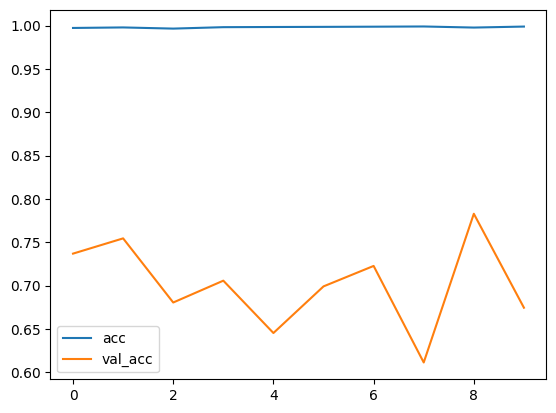

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

In [ ]:
def predict_sentiment(text):
    text = remove_punctuations(text, punc_list)
    text = text.lower()
    sentiment_label = {0: "Negative", 1: "Positive"}
    tw = tokenizer.texts_to_sequences([text])
    tw = pad_sequences(tw,maxlen=200)
    prediction = int(model.predict(tw).round().item())
    #print(prediction)
    print("Predicted sentiment: ", sentiment_label[prediction])



test_sentence1 = "Aavesham is an amazing movie. I loved the acting of Fahad Faasil and the 3 boys."
predict_sentiment(test_sentence1)

test_sentence2 = """
I love sci-fi and am willing to put up with a lot. Sci-fi movies/TV are usually underfunded, under-appreciated and misunderstood.
I tried to like this, I really did, but it is to good TV sci-fi as Babylon 5 is to Star Trek (the original).
Silly prosthetics, cheap cardboard sets, stilted dialogues, CG that doesn't match the background, and painfully one-dimensional characters cannot be overcome with a 'sci-fi' setting.
(I'm sure there are those of you out there who think Babylon 5 is good sci-fi TV. It's not. It's clichéd and uninspiring.)
While US viewers might like emotion and character development, sci-fi is a genre that does not take itself seriously (cf. Star Trek).
It may treat important issues, yet not as a serious philosophy. It's really difficult to care about the characters here
as they are not simply foolish, just missing a spark of life. Their actions and reactions are wooden and predictable, often painful to watch.
The makers of Earth KNOW it's rubbish as they have to always say "Gene Roddenberry's Earth..." otherwise people would not continue watching.
Roddenberry's ashes must be turning in their orbit as this dull, cheap, poorly edited (watching it without advert breaks really brings this home) trudging Trabant of a show lumbers into space.
Spoiler. So, kill off a main character. And then bring him back as another actor. Jeeez! Dallas all over again.
"""
predict_sentiment(test_sentence2)

test_sentence3 = """
A savage, undisciplined lion has been put behind bars for a circus carnival.
He suddenly notices a hole on the floor of his cell,then sticks his nose into this hole to snuff it.
At first he thinks Bugs Bunny's home is belong to a camel; yet when he wakes Bugs up from his sleep hoisting him up to the ground, there he meets with Bugs, his next trainer. <br /><br />
If you ever wonder how Bugs would turn a savage lion into a Hawaiian hula dancer with traditional skirts on, you should watch this cartoon.
Director Bob McKimson offers endless laughters by means of absurd and unexpected demonstrative humour. <br /><br />
The signature scenes include:<br /><br /
>1/ the look of Bugs Bunny's home, cross-referencing to Donald Duck with
the B.B. name acronym on the headboard of Bugs's bed <br /><br /
>2/ Bugs Bunny's short journey with the mine hoist climbing up to the ground floor <br /><br />
3/ When Nero the Lion calls his friend the Elephant for help, Bugs uses a toy mouse to scare the Elephant; since the Elephant needed a broom to outpower that toy mouse, he uses Nero as a broom! <br /><br />
4/ Bugs becoming a clown with the proper costume and make-up and the practical clown jokes that he makes <br /><br />
5/ the trapeze scene while Nero chasing after Bugs <br /><br /
>6/ the famous Human Cannonball scene after which Nero the Lion starts dancing Hawaiian Hula<br /><br /
>The magic moments which keep Acrobatty Bunny fresh at all times in our memory:<br /><br />
1/ When Bugs comes out of his bunny hole, he thinks he's in the Pinocchio tale; and starts acting to save Pinocchio out of the giant whale's stomach <br /><br /
>2/ When the Lion roars to scare him, Bugs replies back to him with roaring<br /><br />
3/ Bugs arguing with the Lion for he's making so much noise, then finding a piece of wood to rub it against the iron bars while singing in order to make more noise than him <br /><br />
4/ Wearing rubber heels at the circus, Bugs starts to bounce like toy rabbits and causes Nero to bounce! <br /><br />
Those are the 10 main reasons that keeps Acrobatty Bunny as a
Bugs Bunny classic and can be found in the "Bugs Bunny Classics' MGM/UA Video (1989)"
"""
predict_sentiment(test_sentence3)                     # negative ... wrong prediction, supposed to be positive

test_sentence4 = "Hello!"
predict_sentiment(test_sentence4)                     # positive as we did not train any neutral data

test_sentence5 = "Foolishly brilliant strategy."
predict_sentiment(test_sentence5)                     # positive

test_sentence6 = "Though the movie started off slow and the plot was a bit convoluted, the character development was surprisingly good and it had a satisfying ending. It wasn't perfect, but I found myself appreciating it more than I thought I would."
predict_sentiment(test_sentence6)                     # positive

1/1 [==============================] - 0s 82ms/step
Predicted sentiment:  Positive
1/1 [==============================] - 0s 77ms/step
Predicted sentiment:  Negative
1/1 [==============================] - 0s 69ms/step
Predicted sentiment:  Negative
1/1 [==============================] - 0s 76ms/step
Predicted sentiment:  Positive
1/1 [==============================] - 0s 76ms/step
Predicted sentiment:  Positive
1/1 [==============================] - 0s 49ms/step
Predicted sentiment:  Positive


Model accuracy can be improved. It would need some more data to be trained on. As we can see from the plot and the history, validation accuracy is only 70%.